# House Price

### 1. Import Modules and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
train = pd.read_csv('train_houseprice.csv')
test = pd.read_csv('test_houseprice.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test.shape, train.shape

((1459, 80), (1460, 81))

In [6]:
test.set_index('Id'), train.set_index('Id')

(      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 Id                                                                      
 1461          20       RH         80.0    11622   Pave   NaN      Reg   
 1462          20       RL         81.0    14267   Pave   NaN      IR1   
 1463          60       RL         74.0    13830   Pave   NaN      IR1   
 1464          60       RL         78.0     9978   Pave   NaN      IR1   
 1465         120       RL         43.0     5005   Pave   NaN      IR1   
 ...          ...      ...          ...      ...    ...   ...      ...   
 2915         160       RM         21.0     1936   Pave   NaN      Reg   
 2916         160       RM         21.0     1894   Pave   NaN      Reg   
 2917          20       RL        160.0    20000   Pave   NaN      Reg   
 2918          85       RL         62.0    10441   Pave   NaN      Reg   
 2919          60       RL         74.0     9627   Pave   NaN      Reg   
 
      LandContour Utilities LotConfi

###### Separate the target column from the rest of the training data

In [7]:
y = pd.DataFrame(train.SalePrice)

###### Combine the predictors from the two datasets

In [8]:
# td for training data
td = pd.concat([train.drop(['SalePrice'], axis=1),test]).reset_index().drop(['index'], axis=1)

In [9]:
td.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2909,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
2910,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
2911,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
2912,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
2913,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [10]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

### 2. Data Cleaning

###### 2.1. Investigate missing data

In [11]:
max_len = max([len(td[col]) for col in td.columns])

In [12]:
max_len

2919

In [13]:
percentage_nans = td.isna().sum() / max_len

In [14]:
percentage_nans = percentage_nans[percentage_nans > 0]

In [15]:
percentage_nans

MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
dtype: float64

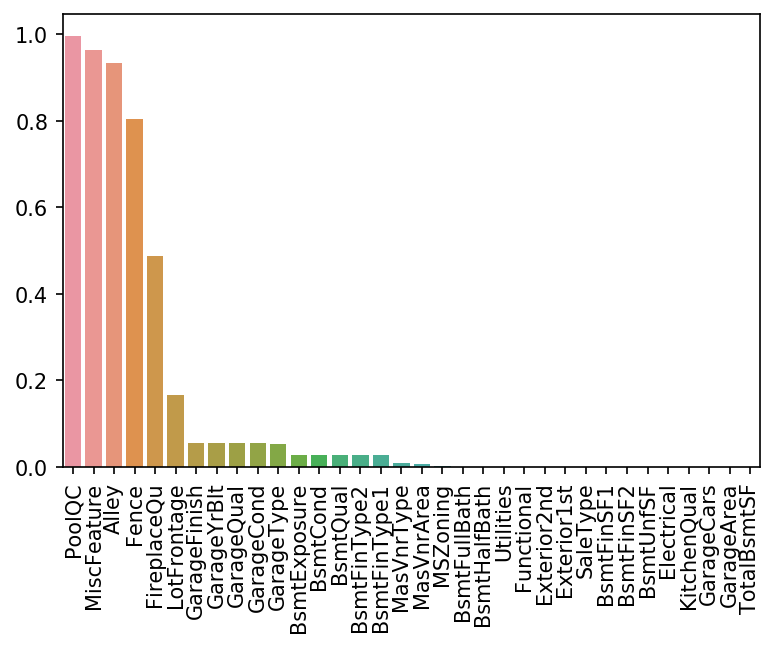

In [16]:
plt.rcParams['figure.dpi'] = 150
plt.xticks(rotation = 90)
sns.barplot(percentage_nans.sort_values(ascending=False).index,
            percentage_nans.sort_values(ascending = False))

###### 2.2. Imputations by Column

In [17]:
# imputation modules
import datawig as dtw

# generator for columns with NaNs for keeping track easily
nan_cols = (i for i in percentage_nans.sort_values(ascending=False).index)

In [18]:
next(nan_cols)

'PoolQC'

###### PoolQC

In [19]:
td.PoolQC.value_counts(dropna=False)

NaN    2909
Gd        4
Ex        4
Fa        2
Name: PoolQC, dtype: int64

In [20]:
# missing data presumably due to lack of a pool
td['PoolQC'] = td['PoolQC'].fillna('None')

In [21]:
td.PoolQC.value_counts(dropna=False)

None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

In [22]:
next(nan_cols)

'MiscFeature'

###### MiscFeature

In [23]:
td['MiscFeature'].value_counts(dropna=False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [24]:
td['MiscFeature'] = td['MiscFeature'].fillna('None')

In [25]:
td['MiscFeature'].value_counts(dropna=False)

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [26]:
next(nan_cols)

'Alley'

###### Alley

In [27]:
td['Alley'].value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [28]:
td['Alley'] = td['Alley'].fillna('None')

In [29]:
td['Alley'].value_counts(dropna=False)

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [30]:
next(nan_cols)

'Fence'

###### Fence

In [31]:
td['Fence'].value_counts(dropna=False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [32]:
td['Fence'] = td['Fence'].fillna('None')

In [33]:
td['Fence'].value_counts(dropna=False)

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [34]:
next(nan_cols)

'FireplaceQu'

###### FireplaceQu

In [35]:
td['FireplaceQu'].value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [36]:
td['FireplaceQu'] = td['FireplaceQu'].fillna('None')

In [37]:
td['FireplaceQu'].value_counts(dropna=False)

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [38]:
next(nan_cols)

'LotFrontage'

###### LotFrontage

In [39]:
td['LotFrontage'].value_counts(dropna=False)

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
155.0      1
141.0      1
136.0      1
28.0       1
137.0      1
Name: LotFrontage, Length: 129, dtype: int64

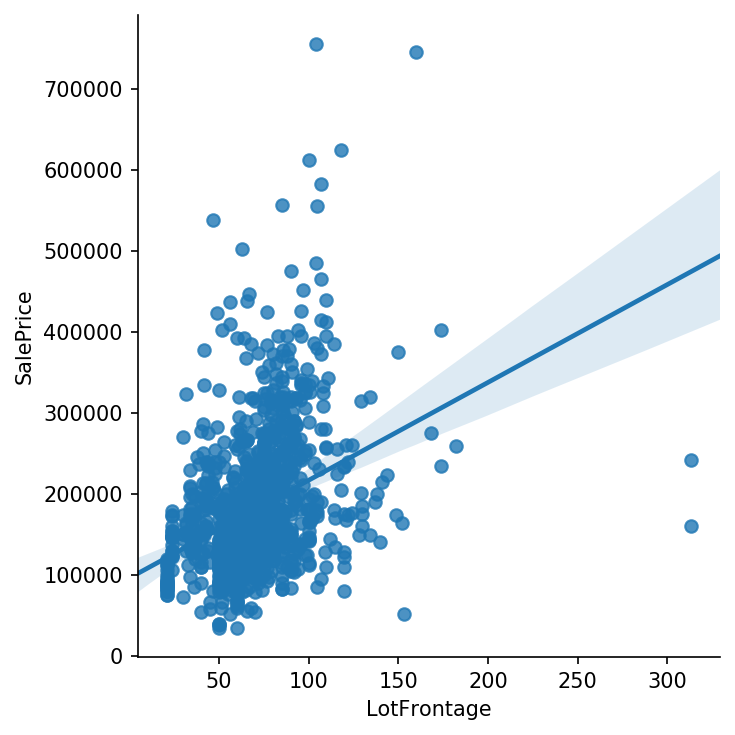

In [40]:
sns.lmplot(x='LotFrontage', y='SalePrice', data=train)

In [41]:
# remove outliers
# first make sure that the points removed are from the training set
td[td['LotFrontage']>300].index

Int64Index([934, 1298], dtype='int64')

In [42]:
td = td.drop(td[td['LotFrontage'] > 300].index)
train = train.drop(train[train['LotFrontage'] > 300].index)

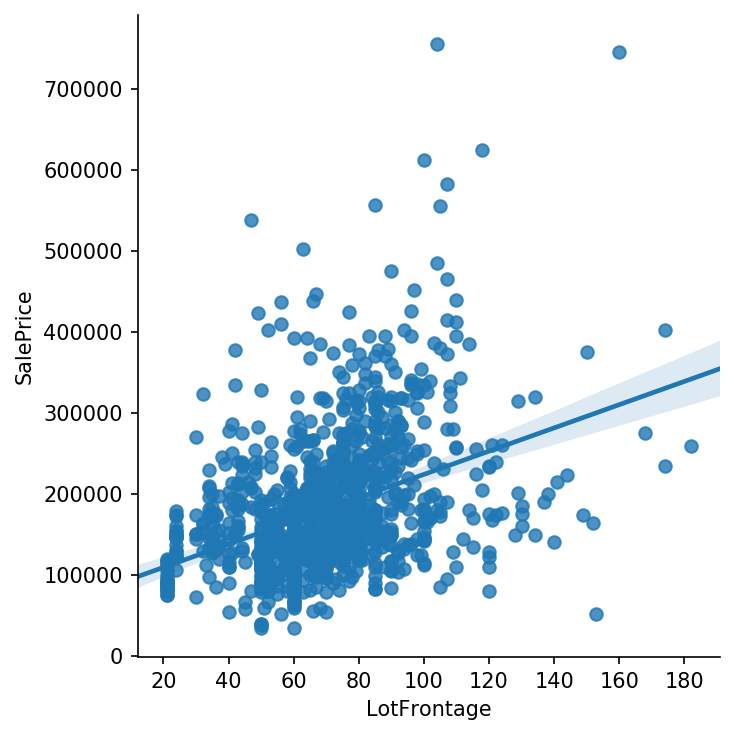

In [43]:
sns.lmplot(x='LotFrontage', y='SalePrice', data=train)

In [44]:
td['LotFrontage'].value_counts(dropna=False)

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
153.0      1
195.0      1
119.0      1
137.0      1
152.0      1
Name: LotFrontage, Length: 128, dtype: int64

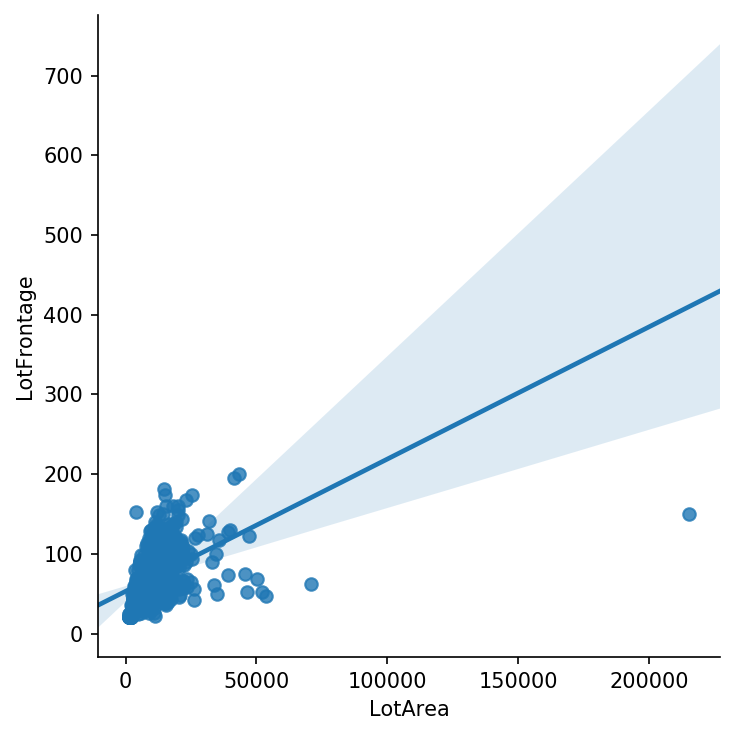

In [45]:
sns.lmplot(y='LotFrontage', x='LotArea', data=td)

In [46]:
td[td['LotArea']>200000].index

Int64Index([313], dtype='int64')

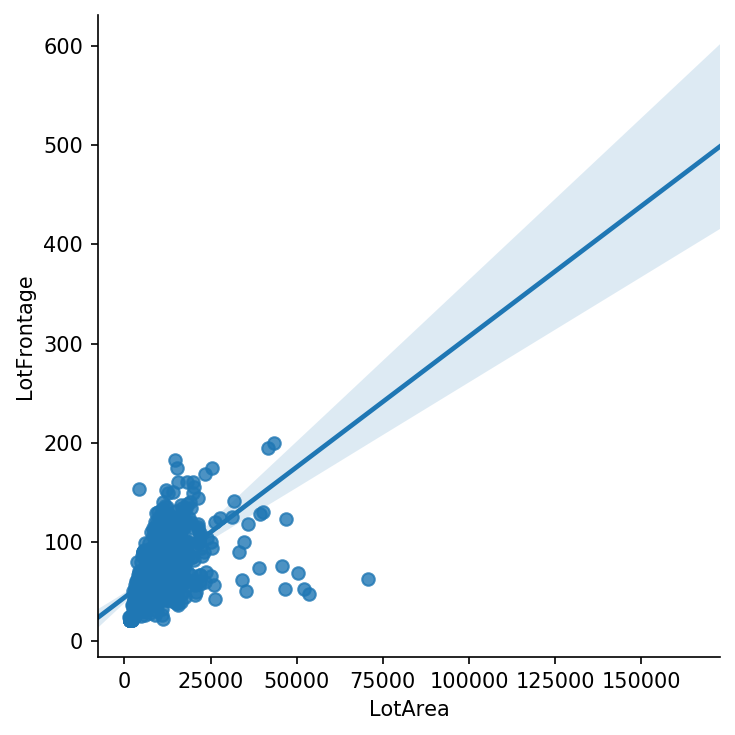

In [47]:
# remove outlier
td_impute_lotfrontage = td.copy().drop(td[td['LotArea'] > 200000].index)
train = train.drop([313])
td=td.drop(td[td['LotArea']>200000].index)
sns.lmplot(y='LotFrontage', x='LotArea', data=td_impute_lotfrontage)

In [48]:
# after removing the outlier, the correlation between the two is still unsatisfactory
# use the median value of the corresponding neighborhood to impute, since commonsensically these two are related
td['LotFrontage'] = td.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

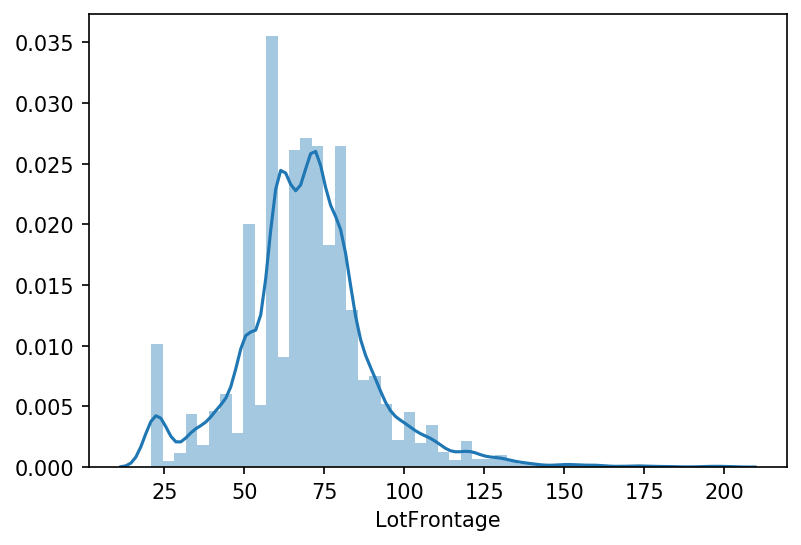

In [49]:
sns.distplot(td['LotFrontage'])

In [50]:
next(nan_cols)

'GarageFinish'

###### GarageFinish

In [51]:
td.GarageFinish.value_counts(dropna=False)

Unf    1230
RFn     809
Fin     718
NaN     159
Name: GarageFinish, dtype: int64

In [52]:
# no satisfactory result from correlation matrix; impute with 'None' since missing values 
# are missing most likely due to the lack of a garage
td['GarageFinish'] = td['GarageFinish'].fillna('None')

In [53]:
td['GarageFinish'].value_counts()

Unf     1230
RFn      809
Fin      718
None     159
Name: GarageFinish, dtype: int64

In [54]:
next(nan_cols)

'GarageYrBlt'

###### GarageYrBlt

In [55]:
# missing most likely due to absence of garage
td['GarageYrBlt'] = td['GarageYrBlt'].fillna('None')

In [56]:
next(nan_cols)

'GarageQual'

###### GarageQual

In [57]:
td['GarageQual'] = td['GarageQual'].fillna('None')

In [58]:
next(nan_cols)

'GarageCond'

###### GarageCond

In [59]:
td['GarageCond'] = td['GarageCond'].fillna('None')

In [60]:
next(nan_cols)

'GarageType'

###### GarageType

In [61]:
td['GarageType'] = td['GarageType'].fillna('None')

In [62]:
next(nan_cols)

'BsmtExposure'

###### BsmtExposure

In [63]:
td['BsmtExposure'].value_counts(dropna=False)

No     1904
Av      418
Gd      273
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64

In [64]:
# impute with 'None' since percentage missing is small and are missing likely due to absence of a basement
td['BsmtExposure'] = td['BsmtExposure'] .fillna('None')

In [65]:
next(nan_cols)

'BsmtCond'

###### BsmtCond

In [66]:
td['BsmtCond'] = td['BsmtCond'].fillna('None')

In [67]:
next(nan_cols)

'BsmtQual'

###### BsmtQual

In [68]:
td['BsmtQual'] = td['BsmtQual'].fillna('None')

In [69]:
next(nan_cols)

'BsmtFinType2'

###### BsmtFinType2

In [70]:
td['BsmtFinType2'] = td['BsmtFinType2'].fillna('None')

In [71]:
next(nan_cols)

'BsmtFinType1'

###### BsmtFinType1

In [72]:
td['BsmtFinType1'] = td['BsmtFinType1'].fillna('None')

In [73]:
next(nan_cols)

'MasVnrType'

###### MasVnrType

In [74]:
td['MasVnrType'].value_counts(dropna=False)

None       1740
BrkFace     879
Stone       248
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [75]:
td['MasVnrType'] = td['MasVnrType'].fillna('None')

In [76]:
next(nan_cols)

'MasVnrArea'

###### MasVnrArea

In [77]:
td['MasVnrArea'] = td['MasVnrArea'].fillna(0)

In [78]:
next(nan_cols)

'MSZoning'

###### MSZoning

In [79]:
td['MSZoning'].value_counts(dropna=False)

RL         2262
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [80]:
# fill with RL (mode)
td['MSZoning'] = td['MSZoning'].fillna('RL')

In [81]:
next(nan_cols)

'BsmtFullBath'

###### BsmtFullBath

In [82]:
td['BsmtFullBath'].value_counts(dropna=False)

0.0    1705
1.0    1171
2.0      36
NaN       2
3.0       2
Name: BsmtFullBath, dtype: int64

In [83]:
# fill with 0
td['BsmtFullBath'] = td['BsmtFullBath'].fillna(0)

In [84]:
next(nan_cols)

'BsmtHalfBath'

###### BsmtHalfBath

In [85]:
td['BsmtHalfBath'].value_counts(dropna=False)

0.0    2739
1.0     171
2.0       4
NaN       2
Name: BsmtHalfBath, dtype: int64

In [86]:
td['BsmtHalfBath'] = td['BsmtHalfBath'].fillna(0)

In [87]:
next(nan_cols)

'Utilities'

###### Utilities

In [88]:
td['Utilities'].value_counts(dropna=False)

AllPub    2913
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [89]:
# fill with mode
td['Utilities'] = td['Utilities'].fillna('AllPub')

In [90]:
next(nan_cols)

'Functional'

###### Functional

In [91]:
td['Functional'].value_counts(dropna=False)

Typ     2714
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [92]:
# fill with Typ as per data description
td['Functional'] = td['Functional'].fillna('Typ')

In [93]:
next(nan_cols)

'Exterior2nd'

###### Exterior2nd

In [94]:
td['Exterior2nd'].value_counts(dropna=False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     390
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      46
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [95]:
td['Exterior2nd'] = td['Exterior2nd'].fillna('VinylSd')

In [96]:
next(nan_cols)

'Exterior1st'

###### Exterior1st

In [97]:
td['Exterior1st'].value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     410
Plywood     221
CemntBd     126
BrkFace      86
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [98]:
td['Exterior1st'] = td['Exterior1st'].fillna('VinylSd')

In [99]:
next(nan_cols)

'SaleType'

###### SaleType

In [100]:
td['SaleType'].value_counts(dropna=False)

WD       2523
New       238
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [101]:
td['SaleType'] = td['SaleType'].fillna('WD')

In [102]:
next(nan_cols)

'BsmtFinSF1'

###### BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF

In [103]:
td['BsmtFinSF1'].value_counts(dropna=False)

0.0       929
24.0       27
16.0       14
300.0       9
20.0        8
         ... 
1158.0      1
1122.0      1
1022.0      1
939.0       1
1106.0      1
Name: BsmtFinSF1, Length: 990, dtype: int64

In [104]:
td['BsmtFinSF1'] = td['BsmtFinSF1'].fillna(0.0)

In [105]:
next(nan_cols)

'BsmtFinSF2'

In [106]:
td['BsmtFinSF2'] = td['BsmtFinSF2'].fillna(0.0)

In [107]:
next(nan_cols)

'BsmtUnfSF'

In [108]:
td['BsmtUnfSF'] = td['BsmtUnfSF'].fillna(0.0)

In [109]:
next(nan_cols)

'Electrical'

###### Electrical

In [110]:
td['Electrical'].value_counts(dropna=False)

SBrkr    2668
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [111]:
td['Electrical'] = td['Electrical'].fillna('SBrkr')

In [112]:
next(nan_cols)

'KitchenQual'

###### KitchenQual

In [113]:
td['KitchenQual'].value_counts(dropna=False)

TA     1491
Gd     1150
Ex      204
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [114]:
td['KitchenQual'] = td['KitchenQual'].fillna('TA')

In [115]:
next(nan_cols)

'GarageCars'

###### GarageCars

In [116]:
td['GarageCars'].value_counts(dropna=False)

2.0    1591
1.0     776
3.0     374
0.0     157
4.0      16
NaN       1
5.0       1
Name: GarageCars, dtype: int64

In [117]:
td['GarageCars'] = td['GarageCars'].fillna(0.0)

In [118]:
next(nan_cols)

'GarageArea'

###### GarageArea

In [119]:
td['GarageArea'].value_counts(dropna=False)

0.0      157
576.0     97
440.0     96
240.0     69
484.0     68
        ... 
263.0      1
962.0      1
186.0      1
954.0      1
803.0      1
Name: GarageArea, Length: 603, dtype: int64

In [120]:
td['GarageArea'] = td['GarageArea'].fillna(0.0)

In [121]:
next(nan_cols)

'TotalBsmtSF'

###### TotalBsmtSF

In [122]:
td['TotalBsmtSF'].value_counts(dropna=False)

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
961.0      1
1949.0     1
1231.0     1
1829.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [123]:
td['TotalBsmtSF'] = td['TotalBsmtSF'].fillna(0.0)

In [124]:
next(nan_cols)

StopIteration: 

In [ ]:
# end of imputation

In [125]:
# check if there is any NaN slipped through
td.isna().sum().sum()

0

In [126]:
td = td.drop(['Utilities', 'Street', 'PoolQC', 'OverallQual', 'GrLivArea'], axis=1)

###### 2.3. Label Encoding

In [127]:
td['haspool'] = td['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
td['has2ndfloor'] = td['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
td['hasgarage'] = td['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
td['hasbsmt'] = td['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
td['hasfireplace'] = td['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [128]:
cat_cols = ['MSSubClass', 'MSZoning',  'Alley', 'LotShape', 
            'LandContour',  'LotConfig', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
            'HouseStyle', 'OverallCond', 'YearBuilt', 
            'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
            'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
            'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 
            'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 
            'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
            'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 
            'Fence', 'MiscFeature', 'MoSold', 'YrSold', 
            'SaleType', 'SaleCondition', 'haspool', 'has2ndfloor', 
            'hasgarage', 'hasbsmt', 'hasfireplace']

In [129]:
for col in cat_cols:
    td[col] = td[col].astype(str)

In [130]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2918
Data columns (total 82 columns):
Id               2916 non-null int64
MSSubClass       2916 non-null object
MSZoning         2916 non-null object
LotFrontage      2916 non-null float64
LotArea          2916 non-null int64
Alley            2916 non-null object
LotShape         2916 non-null object
LandContour      2916 non-null object
LotConfig        2916 non-null object
LandSlope        2916 non-null object
Neighborhood     2916 non-null object
Condition1       2916 non-null object
Condition2       2916 non-null object
BldgType         2916 non-null object
HouseStyle       2916 non-null object
OverallQual      2916 non-null object
OverallCond      2916 non-null object
YearBuilt        2916 non-null object
YearRemodAdd     2916 non-null object
RoofStyle        2916 non-null object
RoofMatl         2916 non-null object
Exterior1st      2916 non-null object
Exterior2nd      2916 non-null object
MasVnrType       291

In [131]:
for col in td.columns:
    if td[col].dtype == 'object':
        td[col] = le.fit_transform(td[col])

In [132]:
td.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,10,3,65.0,8450,1,3,3,4,0,...,0,4,2,8,4,0,1,1,1,0
1,2,5,3,80.0,9600,1,3,3,2,0,...,0,7,1,8,4,0,0,1,1,1
2,3,10,3,68.0,11250,1,0,3,4,0,...,0,11,2,8,4,0,1,1,1,1
3,4,11,3,60.0,9550,1,0,3,0,0,...,0,4,0,8,0,0,1,1,1,1
4,5,10,3,84.0,14260,1,0,3,2,0,...,0,3,2,8,4,0,1,1,1,1


In [133]:
td.isna().sum().sum()

0

In [134]:
# engineer less specific features
td['YrBltAndRemod']=td['YearBuilt']+td['YearRemodAdd']
td['TotalSF']=td['TotalBsmtSF'] + td['1stFlrSF'] + td['2ndFlrSF']

td['Total_sqr_footage'] = (td['BsmtFinSF1'] + td['BsmtFinSF2'] +
                                 td['1stFlrSF'] + td['2ndFlrSF'])

td['Total_Bathrooms'] = (td['FullBath'] + (0.5 * td['HalfBath']) +
                               td['BsmtFullBath'] + (0.5 * td['BsmtHalfBath']))

td['Total_porch_sf'] = (td['OpenPorchSF'] + td['3SsnPorch'] +
                              td['EnclosedPorch'] + td['ScreenPorch'] +
                              td['WoodDeckSF'])

###### 2.5. Transformation of Continuous Variables

In [135]:
all_cols = train.columns.tolist()

In [136]:
# investigate skewness
from scipy.stats import skew

all_cols = train.columns.tolist()
all_cols.remove('Street')
all_cols.remove('PoolQC')
all_cols.remove('Utilities')
all_cols.remove('GrLivArea')
cont_cols = []

for col in all_cols:
    if col not in cat_cols:
        cont_cols.append(col)
cont_cols.remove('Id')
cont_cols.remove('SalePrice')

skewness = skew(td[cont_cols].astype('float64'))
skeww = pd.DataFrame(zip(cont_cols, skewness)).set_index(0).sort_values(by = 1, ascending=False)

In [137]:
skeww

,1
0,
MiscVal,21.935910
PoolArea,17.685603
LowQualFinSF,12.082427
3SsnPorch,11.370087
LotArea,10.316318
BsmtFinSF2,4.160377
EnclosedPorch,4.001570
ScreenPorch,3.944305
MasVnrArea,2.616243


In [138]:
td.isna().sum().sum()

0

In [139]:
# boxcox transform the skewed data
predictors_trans = skeww[skeww[1]>0.5].index.tolist()
predictors_trans

['MiscVal',
 'PoolArea',
 'LowQualFinSF',
 '3SsnPorch',
 'LotArea',
 'BsmtFinSF2',
 'EnclosedPorch',
 'ScreenPorch',
 'MasVnrArea',
 'OpenPorchSF',
 'WoodDeckSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '2ndFlrSF',
 'TotalBsmtSF',
 'LotFrontage']

In [140]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [141]:
from scipy.special import boxcox1p
for col in predictors_trans:
    td[col] = boxcox1p(td[col], boxcox_normmax(td[col] + 1))

/Users/mark/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/mark/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [142]:
td.isna().sum().sum()

0

In [143]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2918
Data columns (total 87 columns):
Id                   2916 non-null int64
MSSubClass           2916 non-null int64
MSZoning             2916 non-null int64
LotFrontage          2916 non-null float64
LotArea              2916 non-null float64
Alley                2916 non-null int64
LotShape             2916 non-null int64
LandContour          2916 non-null int64
LotConfig            2916 non-null int64
LandSlope            2916 non-null int64
Neighborhood         2916 non-null int64
Condition1           2916 non-null int64
Condition2           2916 non-null int64
BldgType             2916 non-null int64
HouseStyle           2916 non-null int64
OverallQual          2916 non-null int64
OverallCond          2916 non-null int64
YearBuilt            2916 non-null int64
YearRemodAdd         2916 non-null int64
RoofStyle            2916 non-null int64
RoofMatl             2916 non-null int64
Exterior1st          2916 no

In [144]:
for col in cat_cols:
    td[col] = td[col].astype('object')

In [145]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2918
Data columns (total 87 columns):
Id                   2916 non-null int64
MSSubClass           2916 non-null object
MSZoning             2916 non-null object
LotFrontage          2916 non-null float64
LotArea              2916 non-null float64
Alley                2916 non-null object
LotShape             2916 non-null object
LandContour          2916 non-null object
LotConfig            2916 non-null object
LandSlope            2916 non-null object
Neighborhood         2916 non-null object
Condition1           2916 non-null object
Condition2           2916 non-null object
BldgType             2916 non-null object
HouseStyle           2916 non-null object
OverallQual          2916 non-null object
OverallCond          2916 non-null object
YearBuilt            2916 non-null object
YearRemodAdd         2916 non-null object
RoofStyle            2916 non-null object
RoofMatl             2916 non-null object
Exterior1s

In [146]:
# transform y
y = train.SalePrice


In [147]:
skew(y)

1.8876222564813563

In [148]:
y = np.log1p(y)

In [149]:
y.isna().sum()

0

In [150]:
td.shape

(2916, 87)

In [176]:
outliers = [30, 88, 462, 631, 1322]
td = td.drop(td.index[outliers])
y = y.drop(y.index[outliers])

In [174]:
overfit = []
for col in td.columns:
    counts = td[col].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(td) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

### 3. Run Models

###### 3.1. Make training and testing data

In [177]:
from sklearn.model_selection import train_test_split
X = td.iloc[:1452, :]

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 87 columns):
Id                   1452 non-null int64
MSSubClass           1452 non-null object
MSZoning             1452 non-null object
LotFrontage          1452 non-null float64
LotArea              1452 non-null float64
Alley                1452 non-null object
LotShape             1452 non-null object
LandContour          1452 non-null object
LotConfig            1452 non-null object
LandSlope            1452 non-null object
Neighborhood         1452 non-null object
Condition1           1452 non-null object
Condition2           1452 non-null object
BldgType             1452 non-null object
HouseStyle           1452 non-null object
OverallQual          1452 non-null object
OverallCond          1452 non-null object
YearBuilt            1452 non-null object
YearRemodAdd         1452 non-null object
RoofStyle            1452 non-null object
RoofMatl             1452 non-null object
Exterior1s

In [179]:
X = X.drop('Id', axis=1)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1040)

In [181]:
X_as = X.copy(deep=True)
for col in X_as:
    X_as[col] = std.fit_transform(X_as[col].values.reshape(-1, 1))

In [182]:
X_as_train, X_as_test, y_train, y_test = train_test_split(X_as, y, test_size=0.2, random_state=1040)

In [183]:
X_final = td.iloc[1452:, :].drop('Id', axis=1)
X_as_final = td.iloc[1452:, :].drop('Id', axis=1)
for col in X_as_final:
    X_as_final[col] = std.fit_transform(X_as_final[col].values.reshape(-1, 1))
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1460 to 2918
Data columns (total 86 columns):
MSSubClass           1459 non-null object
MSZoning             1459 non-null object
LotFrontage          1459 non-null float64
LotArea              1459 non-null float64
Alley                1459 non-null object
LotShape             1459 non-null object
LandContour          1459 non-null object
LotConfig            1459 non-null object
LandSlope            1459 non-null object
Neighborhood         1459 non-null object
Condition1           1459 non-null object
Condition2           1459 non-null object
BldgType             1459 non-null object
HouseStyle           1459 non-null object
OverallQual          1459 non-null object
OverallCond          1459 non-null object
YearBuilt            1459 non-null object
YearRemodAdd         1459 non-null object
RoofStyle            1459 non-null object
RoofMatl             1459 non-null object
Exterior1st          1459 non-null object
Exteri

###### 3.2. Base Models

In [304]:
# gradient boost regressor
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
gbr = GradientBoostingRegressor(n_estimators = 5000, loss='huber', learning_rate=0.02, max_features='sqrt', random_state=1040)
gbr.fit(X_as_train, y_train)
y_pred_gbr = gbr.predict(X_as_test)
msle = mean_squared_log_error
msle(y_test, y_pred_gbr)**0.5

0.008367008955629869

In [302]:
# xgb
import xgboost as xgb
xgbr = xgb.XGBRegressor(learning_rate=0.02, subsample=0.6, max_depth=3,  reg_alpha=0.00006, objective='reg:squarederror', n_estimators=5000, seed = 1040, colsample_bytree=0.7, booster='gbtree', n_jobs=-1)
xgbr.fit(X_as_train, y_train)
y_pred_xgbr = xgbr.predict(X_as_test)
msle(y_test, y_pred_xgbr)**0.5

/Users/mark/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.008550235712056688

In [186]:
# lasso
from sklearn.linear_model import Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0035, normalize=False, max_iter=1000000))
lasso.fit(X_as_train, y_train)
y_pred_lasso = lasso.predict(X_as_test)
msle(y_test, y_pred_lasso)**0.5

0.009536301897939324

In [301]:
# kernel ridge
from sklearn.kernel_ridge import KernelRidge
krr = make_pipeline(RobustScaler(), KernelRidge(alpha=3.7, kernel='polynomial', degree=2, coef0=4.1))
krr.fit(X_as_train, y_train)
y_pred_krr = krr.predict(X_as_test)
msle(y_test, y_pred_krr)**0.5

0.008887573827212298

In [351]:
# elastic net
from sklearn.linear_model import ElasticNetCV
en = make_pipeline(RobustScaler(), ElasticNetCV(cv=kfolds, alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007],
               l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1]))
en.fit(X_as_train, y_train)
y_pred_en = en.predict(X_as_test)
msle(y_test, y_pred_en)**0.5

/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029198925463511216, tolerance: 0.015470736673561147
  tol, rng, random, positive)
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05337108394508405, tolerance: 0.015427358284173624
  tol, rng, random, positive)
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026558039665300015, tolerance: 0.015910381520909674
  tol, rng, random, positive)
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarn

0.009618167279297546

In [350]:
from sklearn.svm import SVR
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
svr.fit(X_as_train, y_train)
y_pred_svr = svr.predict(X_as_test)
msle(y_test, y_pred_svr)**0.5

0.008850544809039277

In [190]:
# voting
# from sklearn.ensemble import VotingRegressor
# estimators=[('krr',krr), ('xgbr', xgbr), ('gbr', gbr), ('lasso', lasso),('stack', stack)]
# vr = VotingRegressor(estimators=estimators,  n_jobs = -1)
# vr.fit(X_as_train, y_train)
# y_pred_vr = vr.predict(X_as_test)
# msle(y_test, y_pred_vr)**0.5

In [306]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.6,
                                       bagging_freq=1, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lgbm.fit(X_as_train, y_train)
y_pred_lgbm = lgbm.predict(X_as_test)
msle(y_test, y_pred_lgbm)**0.5

0.008939753500388581

In [192]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 5000)
rfr.fit(X_as_train, y_train)
y_pred_rfr = rfr.predict(X_as_test)
msle(y_test, y_pred_rfr)**0.5

0.009999051656802278

In [344]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10, shuffle=True)
rr = RidgeCV(cv=kfolds, alphas=[14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5])
rr.fit(X_as_train, y_train)
y_pred_rr = rr.predict(X_as_test)
msle(y_test, y_pred_rr)**0.5

0.0096199582138705

In [352]:
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=(svr, gbr, xgbr, krr, lgbm),
                                meta_regressor=gbr,
                                use_features_in_secondary=True,
                                n_jobs=-1)
stack.fit(np.array(X_as_train), np.array(y_train))
y_pred_stack = stack.predict(np.array(X_as_test))
msle(y_test, y_pred_stack)**0.5

0.007881383400959893

In [381]:
def blend_models_predict(X):
    return ((0.05 * svr.predict(X)) + \
            (0.05 * krr.predict(X)) + \
            (0.15 * gbr.predict(X)) + \
            (0.12 * xgbr.predict(X)) + \
            (0.08 * lgbm.predict(X)) + \
            (0.55 * stack.predict(np.array(X))))
y_pred_blend = blend_models_predict(X_as_test)
msle(y_test, y_pred_blend)**0.5


0.007890082817255197

In [380]:
y_test_norm = np.expm1(y_test)
y_pred_blend_norm = np.expm1(y_pred_blend)
y_pred_stack_norm = np.floor(np.expm1(y_pred_stack))
msle(y_test_norm, y_pred_blend_norm)**0.5

0.10249124153565022

In [396]:
y_pred_logp1_final = gbr.predict(X_as_final)

In [397]:
y_pred_final = np.floor(np.expm1(y_pred_logp1_final))

In [398]:
submission = pd.DataFrame({'Id':td.iloc[1452:, :].Id, 'SalePrice':y_pred_final}).set_index('Id')

In [399]:
submission

,SalePrice
Id,
1461,131342.0
1462,170489.0
1463,198911.0
1464,201631.0
1465,185191.0
...,...
2915,83864.0
2916,83191.0
2917,160022.0


In [400]:
# brute force handling of data points close to outer range
# q1 = submission['SalePrice'].quantile(0.0045)
# q2 = submission['SalePrice'].quantile(0.99)
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

In [401]:
submission

,SalePrice
Id,
1461,131342.0
1462,170489.0
1463,198911.0
1464,201631.0
1465,185191.0
...,...
2915,83864.0
2916,83191.0
2917,160022.0


In [402]:
submission.to_csv('submission_houseprice.csv')